In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import geopandas as gpd
import numpy as np
%matplotlib inline

In [2]:
csvNames = ['Andaman and Nicobar Islands', 'Chhatisgarh', 'Jammu and Kashir', 'Lakshdweep', 'Maharashra', 'Odish', 'Uttarakhand']
mapNames = ['Andaman and Nicobar', 'Chhattisgarh', 'Jammu and Kashmir', 'Lakshadweep', 'Maharashtra', 'Orissa', 'Uttaranchal']
mappingDict = dict(zip(csvNames, mapNames))


In [3]:
data = pd.read_csv('MOP_installed_capacity_sector_mode_wise.csv')
data = data.replace({'&': 'and'}, regex=True)
data = data.replace({'sh.': 'sh'}, regex=True)
data.head()

,Date,State,Sector,Mode,Installed Capacity
0,20-07-2019,Andaman and Nicobar Islands,STATE SECTOR,Thermal,40.048
1,20-07-2019,Andaman and Nicobar Islands,STATE SECTOR,Nuclear,0.000
2,20-07-2019,Andaman and Nicobar Islands,STATE SECTOR,Hydro,0.000
3,20-07-2019,Andaman and Nicobar Islands,STATE SECTOR,RES,5.250
4,20-07-2019,Andaman and Nicobar Islands,PVT SECTOR,Thermal,0.000


In [4]:
data['State'] = data['State'].apply(lambda x: mappingDict[x] if x in mappingDict.keys() else x)

In [5]:
data['State'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttaranchal', 'West Bengal'], dtype=object)

In [6]:
india = gpd.read_file('IND_adm/IND_adm1.shp')
india.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,(POLYGON ((93.78772735595709 6.852640151977653...
1,105,IND,India,2,Andhra Pradesh,State,State,None,None,(POLYGON ((80.27458190917974 13.45958328247065...
2,105,IND,India,3,Arunachal Pradesh,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15777587890625 29.38310050964367,..."
3,105,IND,India,4,Assam,State,State,None,None,(POLYGON ((89.87145233154325 25.53729820251476...
4,105,IND,India,5,Bihar,State,State,None,None,"(POLYGON ((88.1054763793947 26.53903961181646,..."


In [7]:
india.rename(columns={'NAME_1': 'State'}, inplace=True)
india = india.dissolve(by='State', as_index=False)
india.head()

,State,geometry,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1
0,Andaman and Nicobar,(POLYGON ((93.78772735595709 6.852640151977653...,105,IND,India,1,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...
1,Andhra Pradesh,(POLYGON ((80.77348327636719 15.86180973052973...,105,IND,India,2,State,State,None,None
2,Arunachal Pradesh,"POLYGON ((96.15777587890625 29.38310050964367,...",105,IND,India,3,State,State,None,Agence de la Frontière du Nord-Est(French-obso...
3,Assam,(POLYGON ((89.87145233154325 25.53729820251476...,105,IND,India,4,State,State,None,None
4,Bihar,(POLYGON ((84.11967468261713 27.51354026794428...,105,IND,India,5,State,State,None,None


In [8]:
thermalPower = data[data.Mode == 'Thermal'].groupby(by='State').sum().to_dict()['Installed Capacity']
india['thermalPower'] = india['State'].apply(lambda x: thermalPower[x] if x in thermalPower.keys() else 0)

nuclearPower = data[data.Mode == 'Nuclear'].groupby(by='State').sum().to_dict()['Installed Capacity']
india['nuclearPower'] = india['State'].apply(lambda x: nuclearPower[x] if x in nuclearPower.keys() else 0)

hydroPower = data[data.Mode == 'Hydro'].groupby(by='State').sum().to_dict()['Installed Capacity']
india['hydroPower'] = india['State'].apply(lambda x: hydroPower[x] if x in hydroPower.keys() else 0)

resPower = data[data.Mode == 'RES'].groupby(by='State').sum().to_dict()['Installed Capacity']
india['resPower'] = india['State'].apply(lambda x: resPower[x] if x in resPower.keys() else 0)

In [9]:
plotPowers = ['thermalPower', 'nuclearPower', 'hydroPower','resPower']
plotNames = {'thermalPower': 'Thermal', 'nuclearPower': 'Nuclear', 'hydroPower': 'Hydro',
             'resPower':'Renewables', 'windPower': 'Wind', 'solarPower': 'Solar'}
plotNames_plan = {'biomassPlanned': 'Biomass Planned', 'smallHydroPlanned': 'Small Hydro Planned', 'windPlanned': 'Wind Planned', 'solarPlanned': 'Solar Planned'}
maxPower = max(np.max(india[['thermalPower', 'nuclearPower', 'hydroPower','resPower']]))

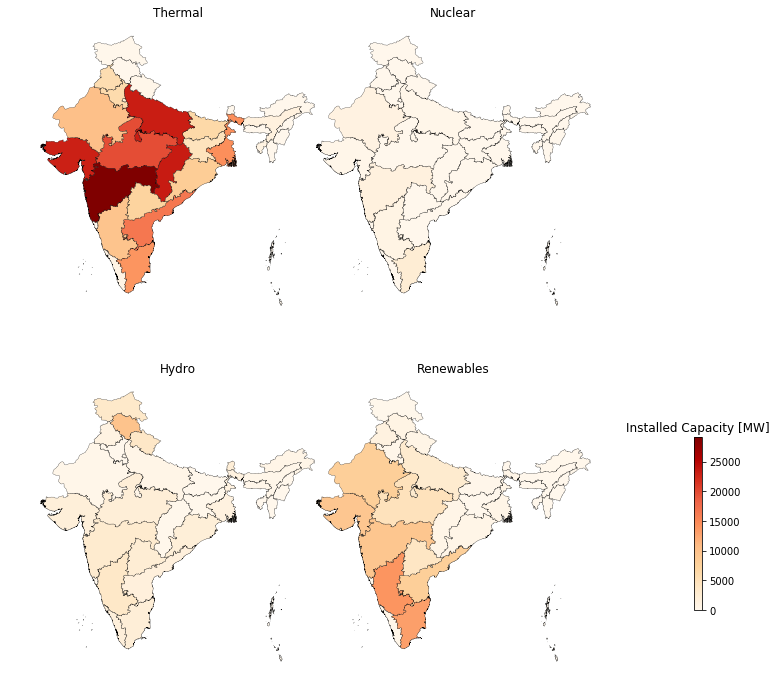

In [10]:
fig, ax = plt.subplots(2,2, figsize=(12, 12))
counter = 0
for i in ax.flat:
        india.plot(ax = i, column=plotPowers[counter], cmap='OrRd', vmin=0, vmax= maxPower, linewidth=0.25, edgecolor='black', legend=False)
        i.set_axis_off()
        i.set_title(plotNames[plotPowers[counter]])
        counter +=1

ax_cbar = fig.add_axes([0.95,0.2,0.01,0.2])
ax_cbar.set_title('Installed Capacity [MW]')
mappable = ax[1, 1].collections[0]
cbar = fig.colorbar(cax = ax_cbar, mappable=mappable)
fig.subplots_adjust(hspace=0.2, wspace=-0.3)

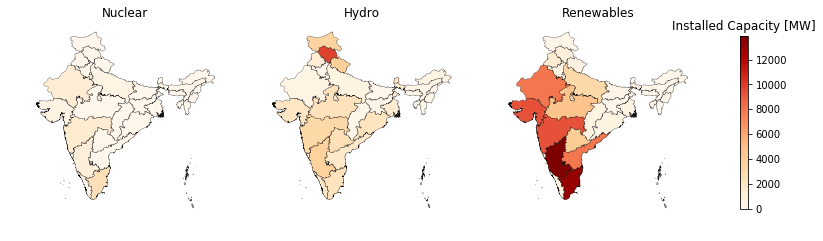

In [11]:
plotPowers2 = ['nuclearPower', 'hydroPower','resPower']
maxPower = max(np.max(india[plotPowers2]))
fig, ax = plt.subplots(1,3, figsize=(12, 12))
counter = 0
for i in ax.flat:
        india.plot(ax = i, column=plotPowers2[counter], cmap='OrRd', vmin=0, vmax= maxPower, linewidth=0.25, edgecolor='black', legend=False)
        i.set_axis_off()
        i.set_title(plotNames[plotPowers2[counter]])
        counter +=1

ax_cbar = fig.add_axes([0.95,0.4,0.01,0.2])
ax_cbar.set_title('Installed Capacity [MW]')
mappable = ax[1].collections[0]
cbar = fig.colorbar(cax = ax_cbar, mappable=mappable)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

In [12]:
windInstalled = pd.read_csv('state_wise_wind.csv')
windPower = windInstalled.groupby(by='State').sum().to_dict()['Installed Capacity']
india['windPower'] = india['State'].apply(lambda x: windPower[x] if x in windPower.keys() else 0)

solarInstalled = pd.read_csv('installed_solar_capacity.csv')
solarPower = solarInstalled.groupby(by='State').sum().to_dict()['Installed Capacity']
india['solarPower'] = india['State'].apply(lambda x: solarPower[x] if x in solarPower.keys() else 0)

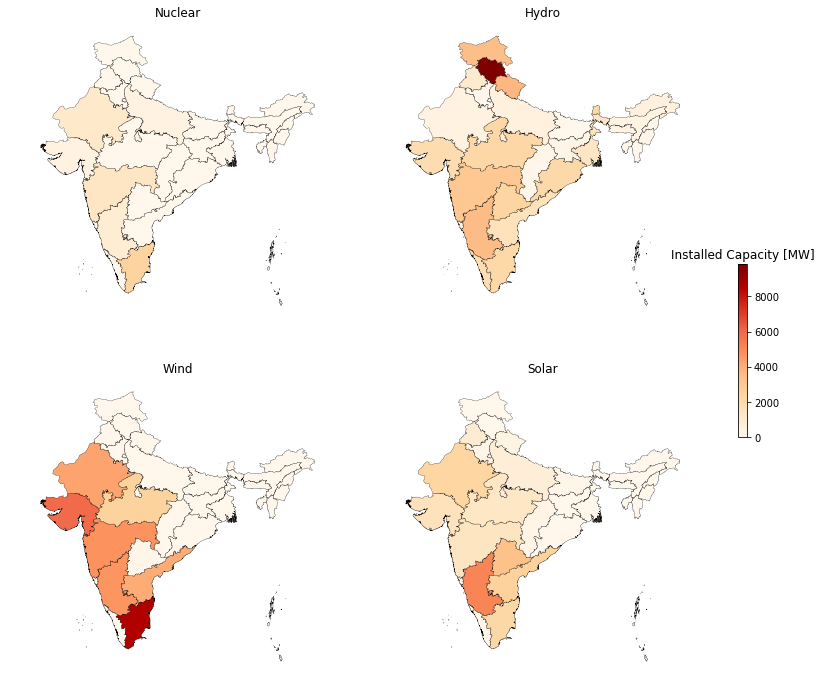

In [15]:
plotPowers2 = ['nuclearPower', 'hydroPower', 'windPower','solarPower']
maxPower = max(np.max(india[plotPowers2]))
fig, ax = plt.subplots(2,2, figsize=(12, 12))
counter = 0
for i in ax.flat:
        india.plot(ax = i, column=plotPowers2[counter], cmap='OrRd', vmin=0, vmax= maxPower, linewidth=0.25, edgecolor='black', legend=False)
        i.set_axis_off()
        i.set_title(plotNames[plotPowers2[counter]])
        counter +=1

ax_cbar = fig.add_axes([0.95,0.4,0.01,0.2])
ax_cbar.set_title('Installed Capacity [MW]')
mappable = ax[1, 1].collections[0]
cbar = fig.colorbar(cax = ax_cbar, mappable=mappable)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

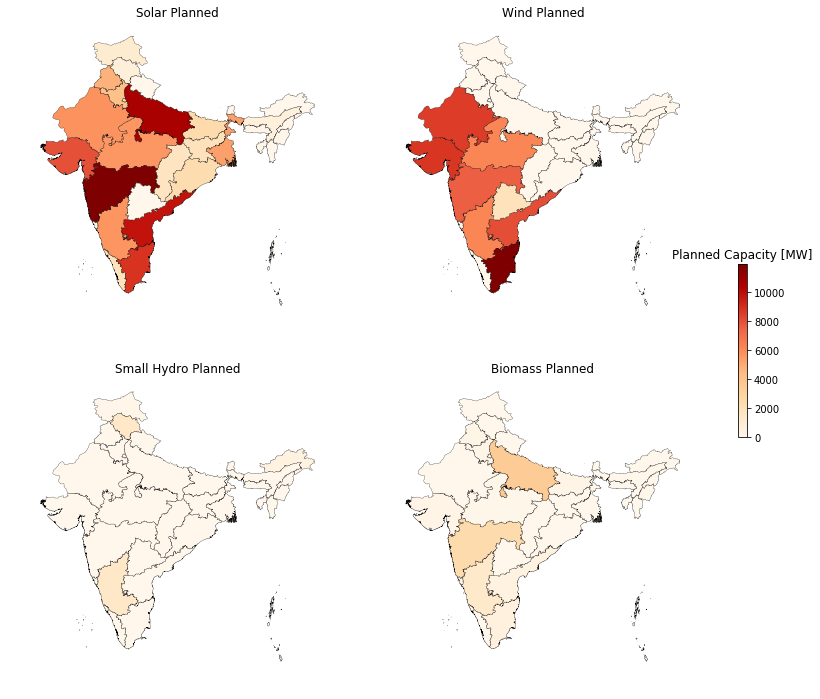

In [14]:
targets_2022 = pd.read_csv('renewable_targets_2022.csv')
solarTarget = targets_2022.groupby(by='State').sum().to_dict()['Solar']
india['solarPlanned'] = india['State'].apply(lambda x: solarTarget[x] if x in solarTarget.keys() else 0)

windTarget = targets_2022.groupby(by='State').sum().to_dict()['Wind']
india['windPlanned'] = india['State'].apply(lambda x: windTarget[x] if x in windTarget.keys() else 0)

shpTarget = targets_2022.groupby(by='State').sum().to_dict()['SHP']
india['smallHydroPlanned'] = india['State'].apply(lambda x: shpTarget[x] if x in shpTarget.keys() else 0)

bioTarget = targets_2022.groupby(by='State').sum().to_dict()['Biomass']
india['biomassPlanned'] = india['State'].apply(lambda x: bioTarget[x] if x in bioTarget.keys() else 0)


plotPowers2 = ['solarPlanned', 'windPlanned', 'smallHydroPlanned', 'biomassPlanned']
maxPower = max(np.max(india[plotPowers2]))
fig, ax = plt.subplots(2,2, figsize=(12, 12))
counter = 0
for i in ax.flat:
        india.plot(ax = i, column=plotPowers2[counter], cmap='OrRd', vmin=0, vmax= maxPower, linewidth=0.25, edgecolor='black', legend=False)
        i.set_axis_off()
        i.set_title(plotNames_plan[plotPowers2[counter]])
        counter +=1

ax_cbar = fig.add_axes([0.95,0.4,0.01,0.2])
ax_cbar.set_title('Planned Capacity [MW]')
mappable = ax[1, 1].collections[0]
cbar = fig.colorbar(cax = ax_cbar, mappable=mappable)
fig.subplots_adjust(hspace=0.2, wspace=0.2)